## Name : Pranav Narkhede

>




### Assignment Week-7


#### Aim: Predict the sale price of a house

In [3]:
# import necessary libraries

import pandas as pd
import sys
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams



%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## EDA


## Load Data


In [4]:
# load dataset
csv_path = "/content/drive/MyDrive/Celebal Week-7/train (1).csv"
df_train = pd.read_csv(csv_path, sep = ',')

csv_path = "/content/drive/MyDrive/Celebal Week-7/test.csv"
df_test = pd.read_csv(csv_path, sep = ',')

In [5]:
# check shape
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [8]:
# first 10 rows of training data
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [9]:
#  first 10 rows of testing data
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [10]:
#  Column names
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- There are 1460 rows and 81 columns
- Large number of null entriescolumns like PoolQC, MiscFeature
-  Three types of datatypes: float64(3), int64(35), object(43)

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

#### Prediction Column==> SalePrice

In [15]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- The average SalePrice of a house is 180,921
- The Maximum SalePrice of a house is 755,000 and Minimum 34,900

Text(171.72222222222234, 0.5, 'Features')

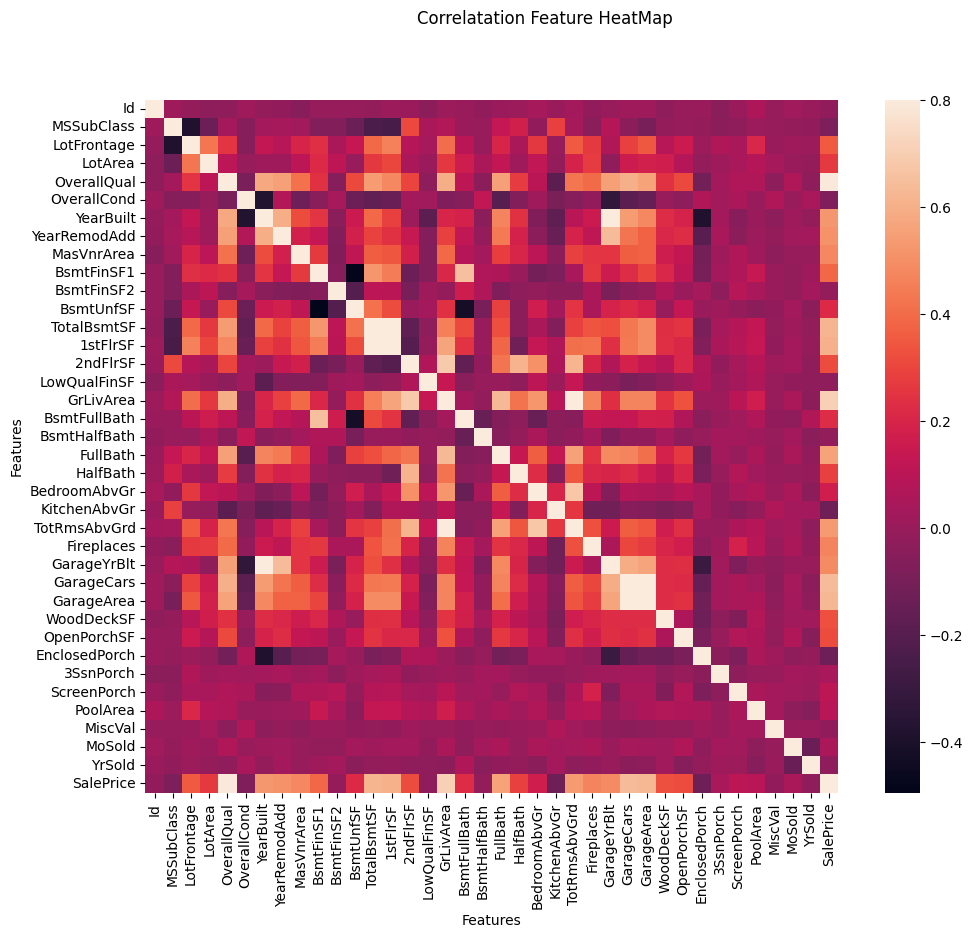

In [18]:
#correlation matrix
non_numeric_columns = df_train.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns
df_numeric = df_train.drop(columns=non_numeric_columns)

corr_mat = df_numeric.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.8,square=True)

plt.suptitle("Correlatation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

Text(99.74999999999999, 0.5, 'Features')

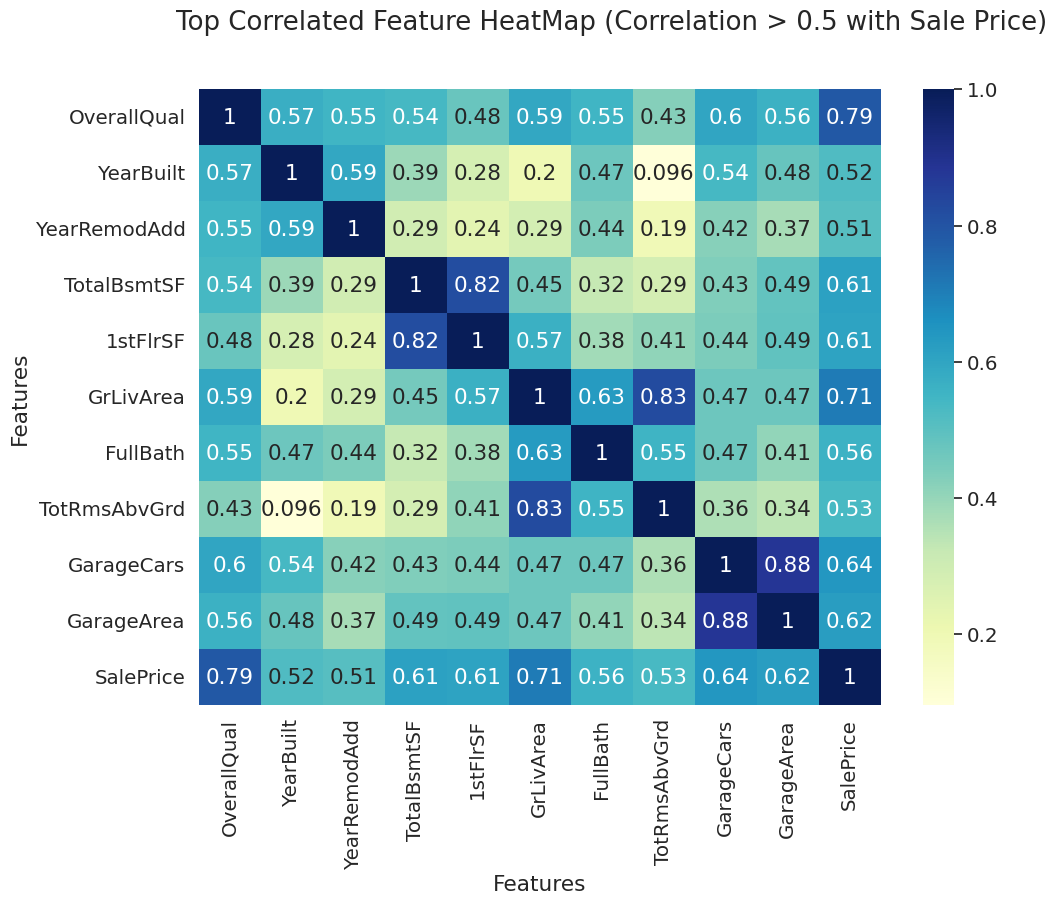

In [20]:
# most correlated features
non_numeric_columns = df_train.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns
df_numeric = df_train.drop(columns=non_numeric_columns)
corr_mat = df_numeric.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g = sns.heatmap(df_train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

- Qual and GrLivArea seem to be the most correlated to SalePrice

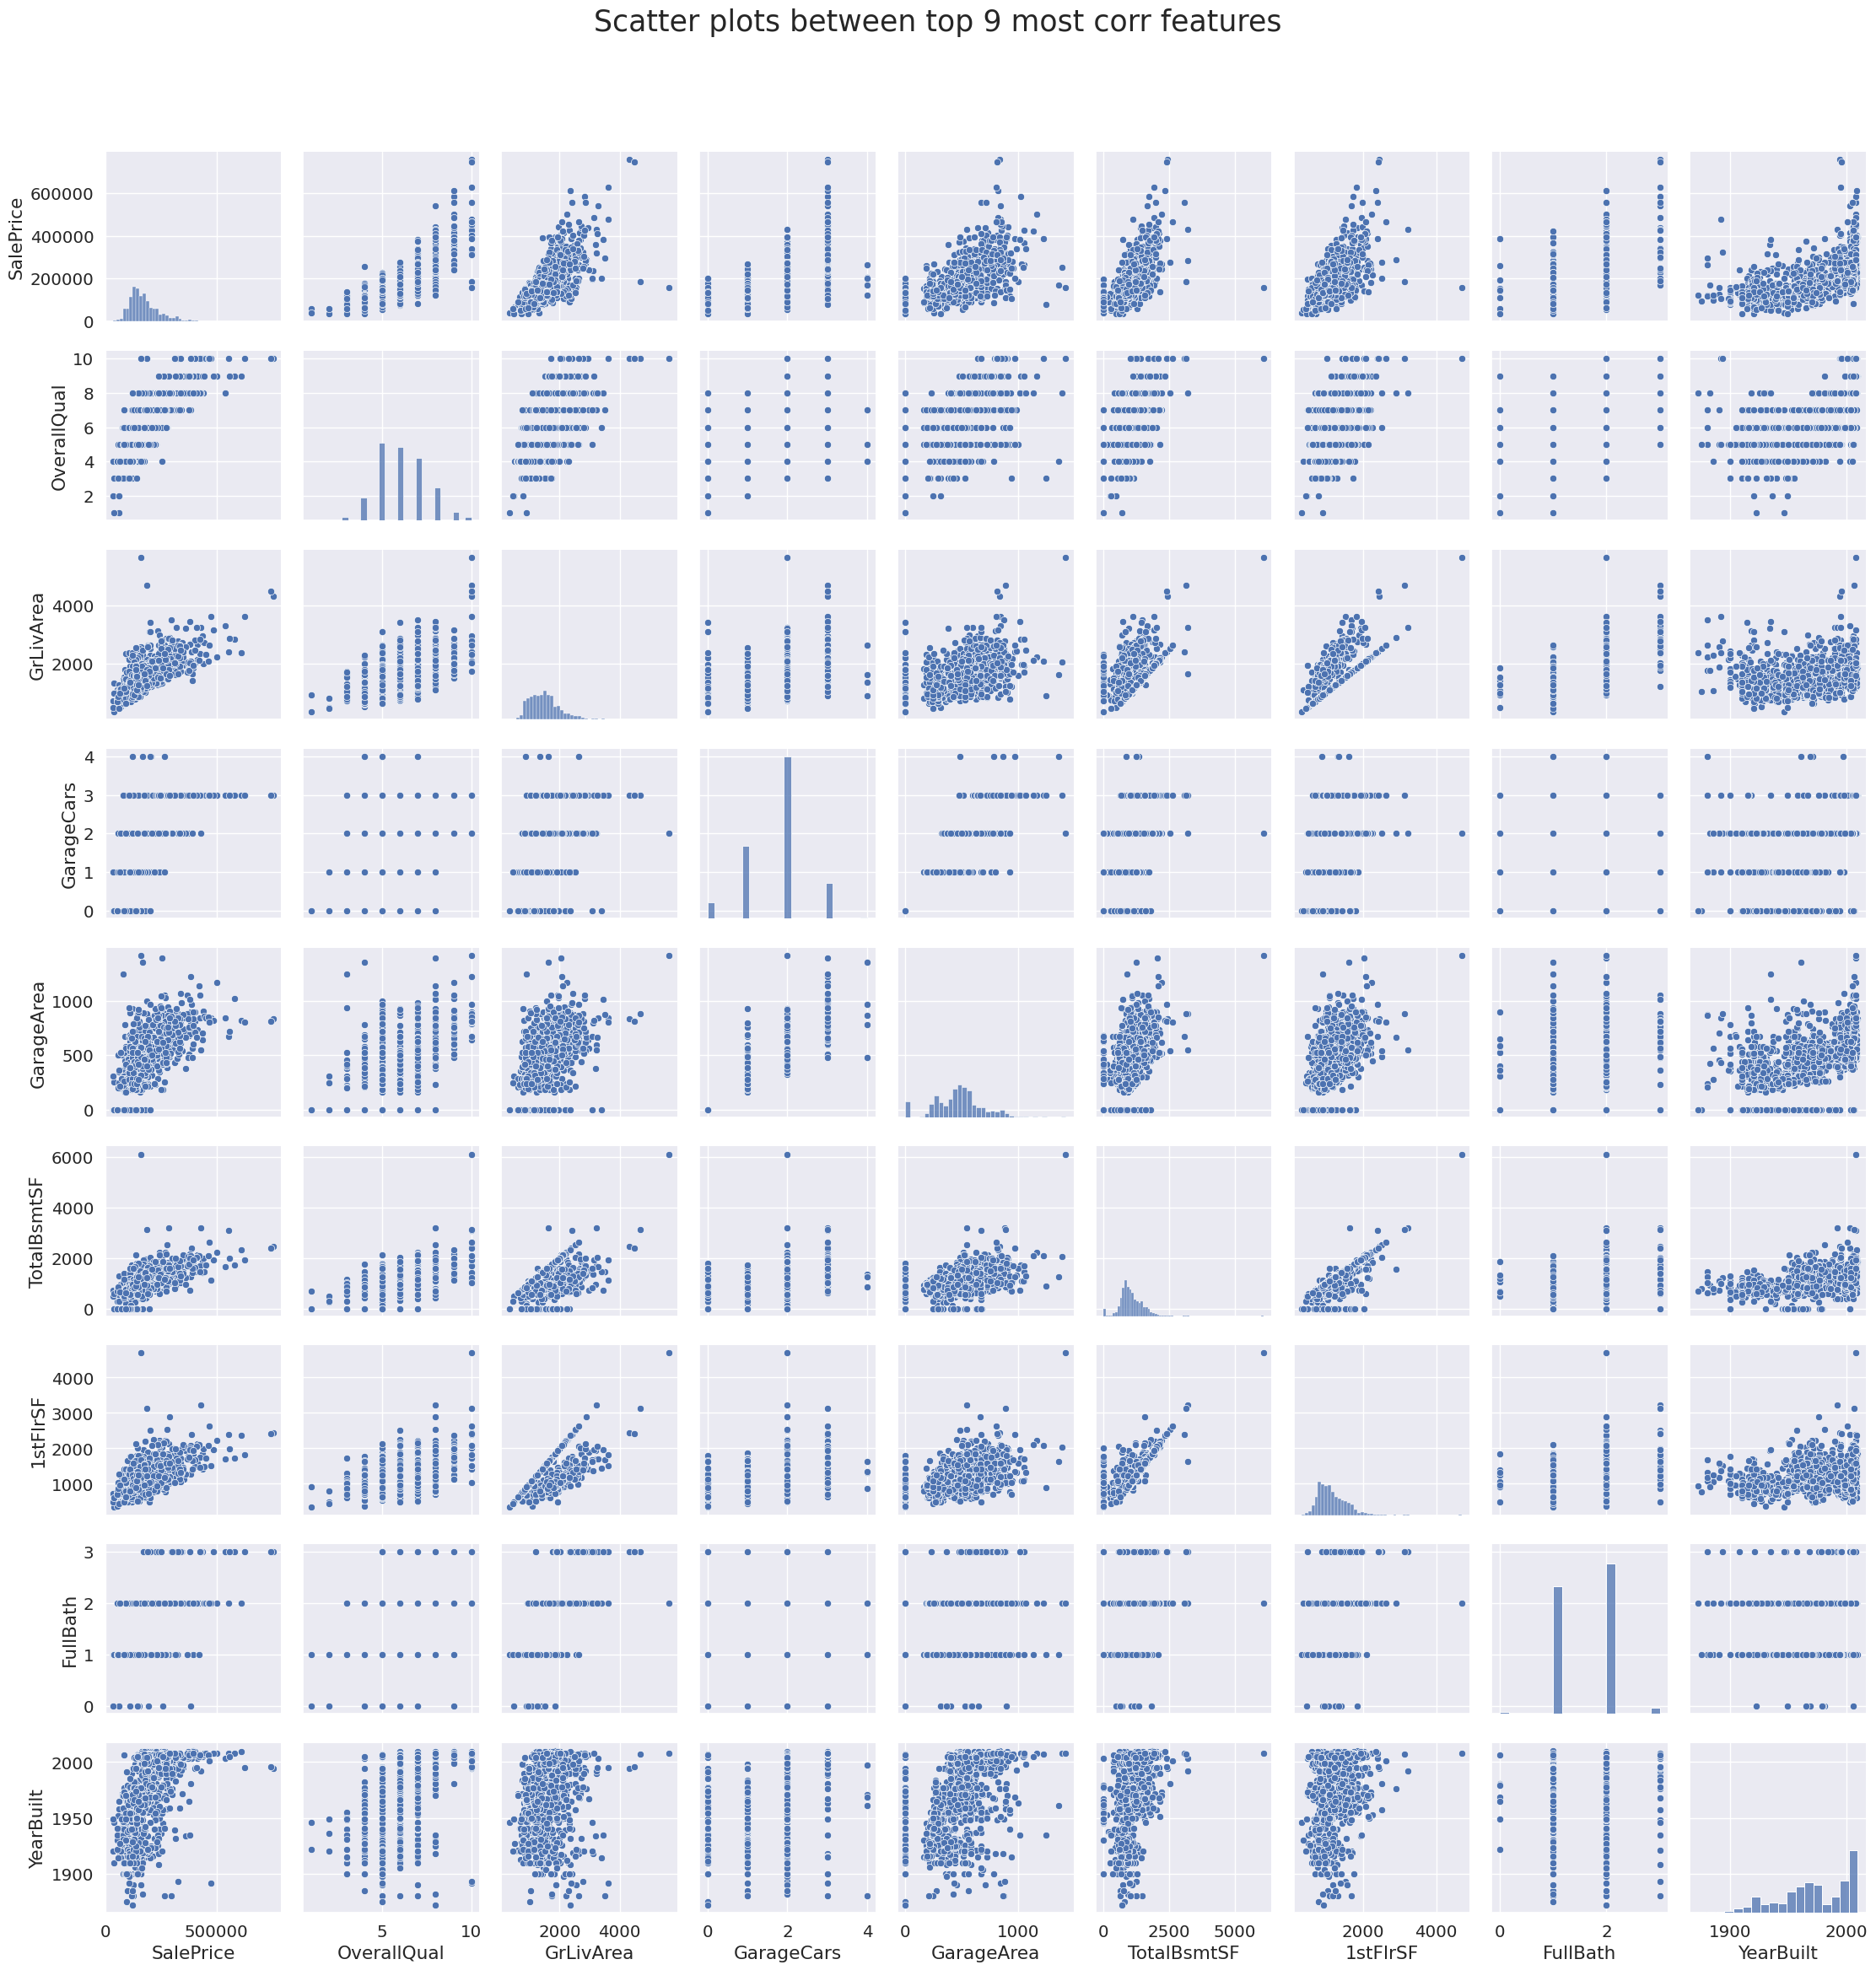

In [22]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

####  HANDLING DATA

#### Drop Id Column

In [23]:
#drop id as it is not required for training or prediction
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

df_train.shape, df_test.shape

((1460, 80), (1459, 79))

#### Checking for Outliers

In [24]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[a], y = df_train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

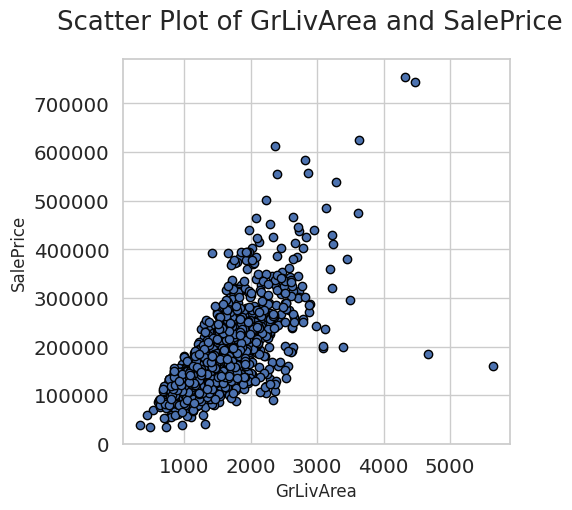

In [25]:
scatter_plot('GrLivArea')


- It can be observed that there are large outliers which can  affect the prediction of sale price
- So the outliers need to be deleted

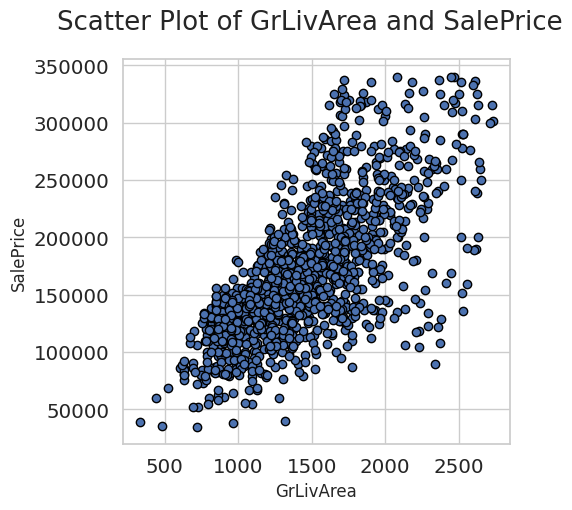

In [28]:
#Deleting outliers
# Calculate the quantiles for GrLivArea and SalePrice
Q1_GrLivArea = df_train['GrLivArea'].quantile(0.25)
Q3_GrLivArea = df_train['GrLivArea'].quantile(0.75)
IQR_GrLivArea = Q3_GrLivArea - Q1_GrLivArea

Q1_SalePrice = df_train['SalePrice'].quantile(0.25)
Q3_SalePrice = df_train['SalePrice'].quantile(0.75)
IQR_SalePrice = Q3_SalePrice - Q1_SalePrice

# Define the outlier criteria
lower_bound_GrLivArea = Q1_GrLivArea - 1.5 * IQR_GrLivArea
upper_bound_GrLivArea = Q3_GrLivArea + 1.5 * IQR_GrLivArea

lower_bound_SalePrice = Q1_SalePrice - 1.5 * IQR_SalePrice
upper_bound_SalePrice = Q3_SalePrice + 1.5 * IQR_SalePrice

# Filter the DataFrame to remove outliers
df_train = df_train[
    (df_train['GrLivArea'] >= lower_bound_GrLivArea) &
    (df_train['GrLivArea'] <= upper_bound_GrLivArea) &
    (df_train['SalePrice'] >= lower_bound_SalePrice) &
    (df_train['SalePrice'] <= upper_bound_SalePrice)
]
#Check the graphic again
scatter_plot('GrLivArea')

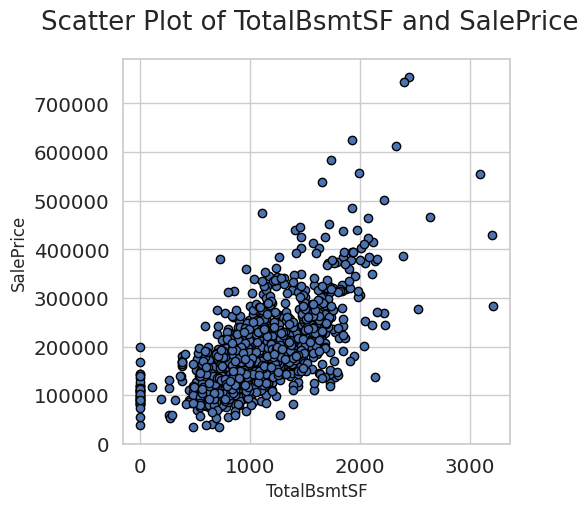

In [27]:
scatter_plot('TotalBsmtSF')

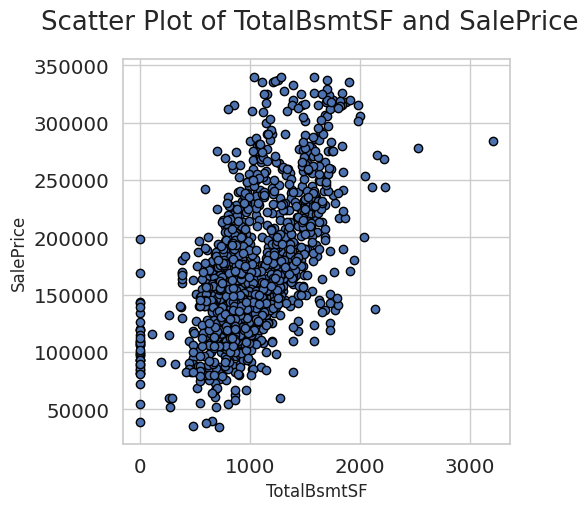

In [30]:
Q1_TotalBsmtSF = df_train['TotalBsmtSF'].quantile(0.25)
Q3_TotalBsmtSF = df_train['TotalBsmtSF'].quantile(0.75)
IQR_TotalBsmtSF = Q3_TotalBsmtSF - Q1_TotalBsmtSF

# Define the outlier criteria
lower_bound_TotalBsmtSF = Q1_TotalBsmtSF - 1.5 * IQR_TotalBsmtSF
upper_bound_TotalBsmtSF = Q3_TotalBsmtSF + 1.5 * IQR_TotalBsmtSF

# Filter the DataFrame to remove outliers
df_train_filtered = df_train[
    (df_train['TotalBsmtSF'] >= lower_bound_TotalBsmtSF) &
    (df_train['TotalBsmtSF'] <= upper_bound_TotalBsmtSF)
]
scatter_plot('TotalBsmtSF')

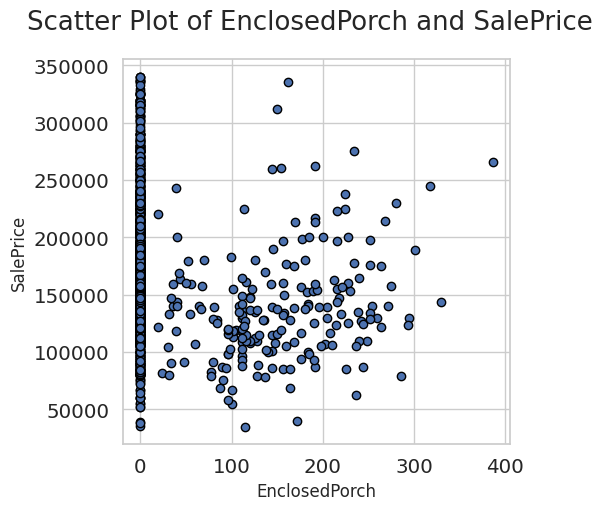

In [32]:
scatter_plot('EnclosedPorch')

- There are no significant outliers

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

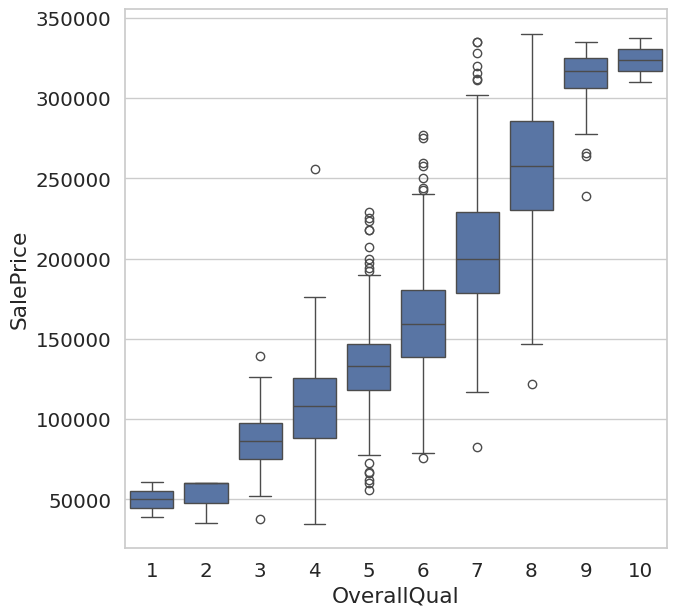

In [37]:
# Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
sns.boxplot(x = df_train['OverallQual'], y="SalePrice", data = data)

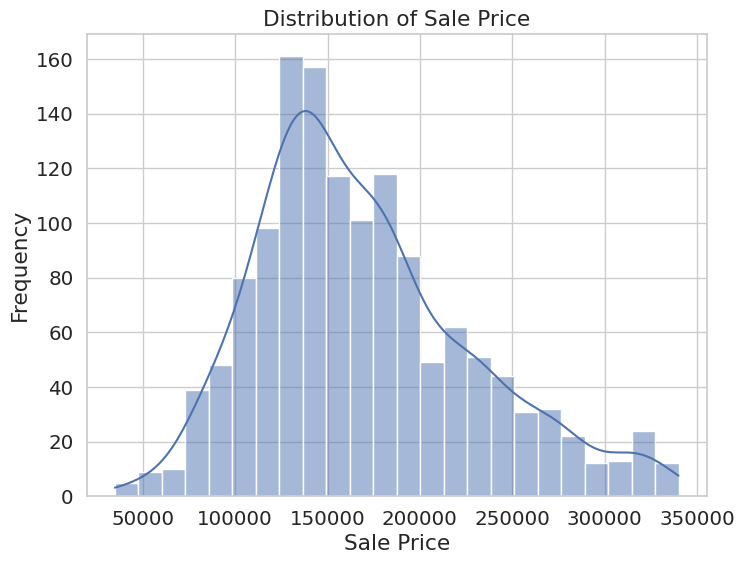

Skewness: 0.69
Kurtosis: 0.14


In [41]:
# Plot the distribution of SalePrice using histplot

from scipy.stats import skew, kurtosis

plt.figure(figsize=(8, 6))
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness and kurtosis
skewness = skew(df_train['SalePrice'])
kurt = kurtosis(df_train['SalePrice'])

print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")

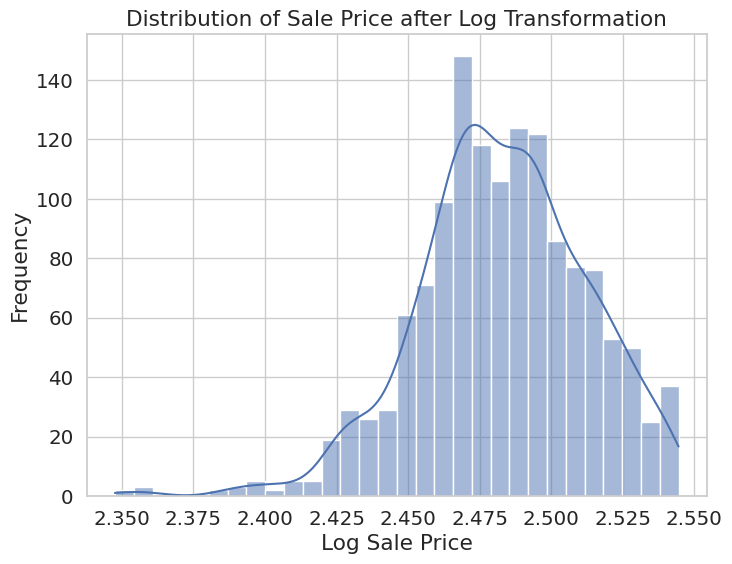

In [43]:
# applying log transformation to correct the positive skewness in the data
# taking logs means that errors in predicting expensive and cheap houses will affect the result equally

# Applying log transformation to SalePrice
df_train['SalePrice'] = np.log(df_train['SalePrice'])

# Plotting the distribution of SalePrice after log transformation
plt.figure(figsize=(8, 6))
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribution of Sale Price after Log Transformation')
plt.xlabel('Log Sale Price')
plt.ylabel('Frequency')
plt.show()

In [44]:
df_train['SalePrice'].describe()

count    1383.000000
mean        2.482713
std         0.029745
min         2.347582
25%         2.465017
50%         2.482697
75%         2.502809
max         2.544488
Name: SalePrice, dtype: float64

In [ ]:
df_train.shape

(1455, 80)

#### Handling missing data

In [46]:
#function to see the missing data in a dataframe
def missing_data(df, n):
    # Total number of missing values
    total_missing = df.isnull().sum().sort_values(ascending=False)

    # Percentage of missing values
    percentage_missing = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100

    # Number of unique values
    unique_values = df.nunique()

    # Concatenate into a single DataFrame
    missing_data_df = pd.concat([total_missing, percentage_missing, unique_values], axis=1,
                                keys=['Total Missing Values', '% of Missing Values', 'Number of Unique Values'], sort=False)

    print(missing_data_df.head(n))

In [47]:
#training data
missing_data(df_train,20)

              Total Missing Values  % of Missing Values  \
PoolQC                        1380            99.783080   
MiscFeature                   1331            96.240058   
Alley                         1294            93.564714   
Fence                         1110            80.260304   
MasVnrType                     852            61.605206   
FireplaceQu                    688            49.746927   
LotFrontage                    253            18.293565   
GarageYrBlt                     79             5.712220   
GarageCond                      79             5.712220   
GarageType                      79             5.712220   
GarageFinish                    79             5.712220   
GarageQual                      79             5.712220   
BsmtExposure                    38             2.747650   
BsmtFinType2                    38             2.747650   
BsmtCond                        37             2.675343   
BsmtQual                        37             2.675343 

In [ ]:
df_train['PoolQC'].unique()

array([nan, 'Fa', 'Gd'], dtype=object)

- PoolQC,Alley have only two unique values
- PoolQC has 99.7% of missing data, which means  most of the houses do not have a pool
- PoolQC,Alley,MiscFeature will be dropped due to large number of missing values

In [48]:
#test data
missing_data(df_test,34)

              Total Missing Values  % of Missing Values  \
PoolQC                        1456            99.794380   
MiscFeature                   1408            96.504455   
Alley                         1352            92.666210   
Fence                         1169            80.123372   
MasVnrType                     894            61.274846   
FireplaceQu                    730            50.034270   
LotFrontage                    227            15.558602   
GarageYrBlt                     78             5.346127   
GarageFinish                    78             5.346127   
GarageQual                      78             5.346127   
GarageCond                      78             5.346127   
GarageType                      76             5.209047   
BsmtCond                        45             3.084304   
BsmtExposure                    44             3.015764   
BsmtQual                        44             3.015764   
BsmtFinType2                    42             2.878684 

In [50]:
df_test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

- Utilities has only 1 unique value  will also be dropped

In [51]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

7498
7878


In [52]:
# save the 'SalePrice'column as train_label
train_label = df_train['SalePrice'].reset_index(drop=True)

# # drop 'SalePrice' column from df_train
df_train = df_train.drop(['SalePrice'], axis=1)
# # now df_train contains all training features

In [53]:
# Function to handle missiing data
def missing (df):

    # drop theses columns due to large null values or many same values
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)

    # Null value likely means No Fence so fill as "None"
    df["Fence"] = df["Fence"].fillna("None")

    # Null value likely means No Fireplace so fill as "None"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())

    # Null value likely means  typical(Typ)
    df["Functional"] = df["Functional"].fillna("Typ")

    # Only one null value so fill as the most frequent value(mode)
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

    # Only one null value so fill as the most frequent value(mode)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

    # Very few null value so fill with the most frequent value(mode)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

    # Null value likely means no masonry veneer
    df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #so fill as o

    # Only one null value so fill as the most frequent value(mode)
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

    #MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

    #Null value likely means no Identified type of dwelling so fill as "None"
    df['MSSubClass'] = df['MSSubClass'].fillna("None")

    # Null value likely means No Garage, so fill as "None" (since these are categorical features)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')

    # Null value likely means No Garage and no cars in garage, so fill as 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)

    # Null value likely means No Basement, so fill as 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)

    # Null value likely means No Basement, so fill as "None" (since these are categorical features)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')

    return df

In [54]:
df_train = missing(df_train)
df_test = missing(df_test)

In [55]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [56]:
df_train.shape,df_test.shape

((1383, 75), (1459, 75))

In [57]:
def add_new_cols(df):

    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath']
                             + (0.5 * df['BsmtHalfBath']))

    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] +
                            df['ScreenPorch'] + df['WoodDeckSF'])

    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])

    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']

    return df

In [58]:
# add the new columns
df_train = add_new_cols(df_train)
df_test = add_new_cols(df_test)

In [59]:
df_train.shape,df_test.shape

((1383, 80), (1459, 80))

In [60]:
#get dummy values for categorical data
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print(df_train.shape)
print(df_test.shape)

(1383, 290)
(1459, 278)


In [61]:
#align the training and testing data
df_train, df_test = df_train.align(df_test, join = 'inner', axis=1)

In [62]:
print(df_train.shape)
print(df_test.shape)

(1383, 276)
(1459, 276)


In [64]:
df_train.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


In [65]:
df_test.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,True,False,False,False,False,True,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,False,True,False,False,False,False,True,False


## Feature Engineering

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train,df_train['SalePrice'],test_size=0.1,random_state=0)

In [73]:
X_train.shape, X_test.shape


((1244, 277), (139, 277))

Since the numerical variables are skewed we will perform log normal distribution



In [74]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df_train[feature]=np.log(df_train[feature])

We will remove categorical variables that are present less than 1% of the observations

In [77]:
categorical_features=[feature for feature in df_train.columns if df_train[feature].dtype=='O']

for feature in categorical_features:
    temp=df_train.groupby(feature)['SalePrice'].count()/len(df_train)
    temp_df=temp[temp>0.01].index
    df_train[feature]=np.where(df_train[feature].isin(temp_df),df_train[feature],'Rare_var')

In [79]:
df_train.head(100)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,4.174387,9.041922,7,5,2003,2003,196.0,706,0,...,False,False,True,False,False,False,False,True,False,0.918424
1,20,4.382027,9.169518,6,8,1976,1976,0.0,978,0,...,False,False,True,False,False,False,False,True,False,0.913868
2,60,4.219508,9.328123,7,5,2001,2002,162.0,486,0,...,False,False,True,False,False,False,False,True,False,0.920679
3,70,4.094345,9.164296,7,5,1915,1970,0.0,216,0,...,False,False,True,True,False,False,False,False,False,0.905140
4,60,4.430817,9.565214,8,5,2000,2000,350.0,655,0,...,False,False,True,False,False,False,False,True,False,0.924279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,30,4.442651,9.270965,5,5,1920,1950,0.0,108,0,...,False,False,False,True,False,False,False,False,False,0.913222
99,20,4.343805,9.139918,4,5,1959,1959,0.0,569,0,...,False,False,True,False,False,False,False,True,False,0.899527
100,20,4.219508,9.268892,6,7,1977,2001,28.0,1200,0,...,False,False,True,False,False,False,False,True,False,0.916883
101,60,4.343805,9.127611,6,5,1985,1985,336.0,0,0,...,False,False,True,False,False,False,False,True,False,0.911594


Feature Scaling

In [82]:
feature_scale=[feature for feature in df_train.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_train[feature_scale])

MinMaxScaler()

In [84]:

scaler.transform(df_train[feature_scale])


array([[0.23529412, 0.41820812, 0.38661469, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.49506375, 0.41296937, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.434909  , 0.44572873, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.29411765, 0.42385922, 0.40060079, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.434909  , 0.41547144, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.47117546, 0.42009566, ..., 0.        , 1.        ,
        0.        ]])

## Feature Selection



In [91]:
# missing_values = df_train['SalePrice'].isnull().sum()

# if missing_values > 0:
#     # Drop rows with missing values in 'SalePrice'
#     df_train = df_train.dropna(subset=['SalePrice'])

# # Now assign 'SalePrice' to y_train
# y_train = df_train[['SalePrice']]

In [92]:
## Capture the dependent feature
y_train=df_train[['SalePrice']]

In [93]:
y_train

,SalePrice
0,0.918424
1,0.913868
2,0.920679
3,0.905140
4,0.924279
...,...
1378,0.912658
1379,0.918657
1380,0.926312
1381,0.905653


In [94]:
## drop dependent feature from dataset
X_train=df_train.drop('SalePrice',axis=1)

In [95]:
### Apply Feature Selection
# First Specify the Lasso Regression model, and select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 82

selected features: 21

features with coefficients shrank to zero: 61

# Linear Regression Model:

In [100]:
from sklearn.metrics import mean_squared_error
import numpy as np

reg = linear_model.LinearRegression()

# Fit the model on training data
model_reg = reg.fit(X_train, y_train)

# Predict SalePrice on the training set
y1_pred = reg.predict(X_train)

# Calculate Root Mean Squared Error (RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate RMSE
rmse_value = rmse(y_train, y1_pred)
print('Root Mean Squared Error (RMSE): {:.2f}'.format(rmse_value))


Root Mean Squared Error (RMSE): 0.01


In [101]:
from sklearn.neighbors import KNeighborsRegressor

# N = 5 #
neigh = KNeighborsRegressor(n_neighbors = 5,
                            weights = 'uniform',
                            algorithm = 'auto',
                            leaf_size=25)
neigh.fit(X_train,y_train)

#predict value of sale price on the training set
y4_pred = neigh.predict(X_train)

#caculate root mean square error
rmse(y4_pred,y_train)

0.010753575354122578

## KNN Model

In [102]:
# N = 7 #
neigh1 = KNeighborsRegressor(n_neighbors = 7,
                             weights = 'uniform',
                             leaf_size=25)
neigh1.fit(X_train,y_train)

#predict value of quality on the training set
y_pred = neigh1.predict(X_train)

#caculate root mean square error
rmse(y_pred,y_train)

0.011088035961332846

In [103]:
# N = 9 #
neigh2 = KNeighborsRegressor(n_neighbors = 9,
                             weights = 'uniform',
                             leaf_size=25)
neigh2.fit(X_train,y_train)

#predict value of quality on the training set
y_pred = neigh2.predict(X_train)

#caculate root mean square error
rmse(y_pred,y_train)

0.011329939186517635

 N=5 performs best



# Decision Tree


In [107]:
from sklearn import tree
# set max depth to 5
tree_regr1 = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf=5,random_state=42)

# set max depth to 9
tree_regr2 = tree.DecisionTreeRegressor(max_depth = 9,min_samples_leaf=9,random_state=42)

#fit the traning data to a decision tree model
tree_regr11 = tree_regr1.fit(X_train,y_train)
tree_regr12 = tree_regr2.fit(X_train,y_train)

#predict value of sale price on the training set
y1 = tree_regr1.predict(X_train)
y2 = tree_regr2.predict(X_train)

print(rmse(y1,y_train))
print(rmse(y2,y_train))

0.010841784665823376
0.010511182159705602
